In [1]:
# Import necessary libraries
!pip install opencv-python --index-url=https://pypi.python.org/simple/
import requests
from bs4 import BeautifulSoup
import cv2
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.python.org/simple/


In [5]:
# Step 1: Data Collection
import os

def get_local_videos(directory_path):
    # Ensure the directory exists
    if not os.path.exists(directory_path):
        print(f"Directory not found: {directory_path}")
        return None

    # Get a list of all files in the directory
    all_files = os.listdir(directory_path)

    # Filter out only video files (you can customize the extensions)
    video_files = [file for file in all_files if file.endswith(('.mp4', '.avi', '.mkv','.DAT'))]

    return video_files

# Specify the directory path where your videos are stored
video_directory = 'C:/Windows.old/Users/AZEEZ205/Downloads/AchivalVideos'

# Example usage:
local_videos = get_local_videos(video_directory)

if local_videos:
    print("Local Videos:")
    for i, video in enumerate(local_videos, start=1):
        print(f"{i}. {video}")
else:
    print("No videos found in the specified directory.")

Local Videos:
1. AVSEQ01.DAT
2. AVSEQ02.DAT
3. AVSEQ03.DAT
4. AVSEQ04.DAT


In [6]:
import cv2
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 3: Feature Extraction
# Extract features from images and videos
def extract_features(image_urls, video_directory, video_descriptions):
    # Feature extraction from images
    image_features = []

    for image_url in image_urls:
        # Download and process the image (you may need to adjust the image loading based on your actual scenario)
        img = cv2.imread(image_url)
        
        if img is not None:
            # Extract features from the image using image processing techniques
            # For example, you could use color histograms, edge detection, or deep learning-based methods

            # Dummy feature for illustration (replace with your actual image feature extraction)
            dummy_feature = np.random.rand(10)
            image_features.append(dummy_feature)
        else:
            print(f"Failed to read image: {image_url}")

    # Feature extraction from videos
    video_features = []

    # Read video files from the specified directory
    for video_file in os.listdir(video_directory):
        if video_file.endswith(('.mp4', '.avi', '.mkv')):
            video_path = os.path.join(video_directory, video_file)
            cap = cv2.VideoCapture(video_path)

            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

            # Dummy feature for illustration (replace with your actual video feature extraction)
            dummy_feature = np.random.rand(frame_count, 10)
            video_features.append(dummy_feature)

            cap.release()

    # Feature extraction from video descriptions
    vectorizer = TfidfVectorizer()
    video_description_features = vectorizer.fit_transform(video_descriptions)

    return {'image_features': image_features, 'video_features': video_features, 'video_description_features': video_description_features}

# Example usage:
image_urls = ["path/to/image1.jpg", "path/to/image2.jpg"]
video_directory = 'C:/Windows.old/Users/AZEEZ205/Downloads/AchivalVideos'
#'C:/Users/obadi/Downloads/AchivalVideos'"C:\Windows.old\Users\AZEEZ205\Downloads\AchivalVideos"
video_descriptions = ["Description of video 1.", "Description of video 2."]

features = extract_features(image_urls, video_directory, video_descriptions)
print("Extracted Features:")
print(features)


Failed to read image: path/to/image1.jpg
Failed to read image: path/to/image2.jpg
Extracted Features:
{'image_features': [], 'video_features': [], 'video_description_features': <2x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>}


In [2]:
# Step 4: Data Integration
# Combine information from various sources
def integrate_data(scraped_data, extracted_features):
    integrated_data = {'images': [], 'videos': [], 'features': []}

    for i in range(len(scraped_data['images'])):
        image_url = scraped_data['images'][i]['url']
        video_url = scraped_data['videos'][i]['url']
        image_feature = scraped_data['images'][i]['feature']

        integrated_data['images'].append({'url': image_url, 'feature': image_feature})
        integrated_data['videos'].append({'url': video_url})
        
        # Convert the list to a NumPy array
        features_array = np.array(extracted_features['video_description_features'][i])
        integrated_data['features'].append(features_array)

    return integrated_data

# Example usage:
scraped_data = {'images': [{'url': 'image_url_1.jpg', 'feature': [0.1, 0.2, 0.3]},
                            {'url': 'image_url_2.jpg', 'feature': [0.4, 0.5, 0.6]}],
                'videos': [{'url': 'video_url_1.mp4'}, {'url': 'video_url_2.mp4'}]}
extracted_features = {'image_features': [np.random.rand(10), np.random.rand(10)],
                      'video_description_features': [[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]]}

integrated_data = integrate_data(scraped_data, extracted_features)
print("Integrated Data:")
print(integrated_data)

Integrated Data:
{'images': [{'url': 'image_url_1.jpg', 'feature': [0.1, 0.2, 0.3]}, {'url': 'image_url_2.jpg', 'feature': [0.4, 0.5, 0.6]}], 'videos': [{'url': 'video_url_1.mp4'}, {'url': 'video_url_2.mp4'}], 'features': [array([0.1, 0.2, 0.3]), array([0.4, 0.5, 0.6])]}


In [7]:
# Step 5: Data Storage
# Store data in a Pandas DataFrame or a database
def store_data(integrated_data):
    # Create a Pandas DataFrame for integrated data
    df = pd.DataFrame({
        'image_url': [entry['url'] for entry in integrated_data['images']],
        'video_url': [entry['url'] for entry in integrated_data['videos']],
        'image_feature': [entry['feature'] for entry in integrated_data['images']],
        'video_description_feature': integrated_data['features']
    })

    # Save the DataFrame to a CSV file (you can choose another format based on your needs)
    df.to_csv('integrated_data.csv', index=False)

# Example usage:
integrated_data = {
    'images': [{'url': 'image_url_1.jpg', 'feature': [0.1, 0.2, 0.3]},
               {'url': 'image_url_2.jpg', 'feature': [0.4, 0.5, 0.6]}],
    'videos': [{'url': 'video_url_1.mp4'}, {'url': 'video_url_2.mp4'}],
    'features': [[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]]
}

store_data(integrated_data)

In [8]:
import pandas as pd
import numpy as np

def analyze_data(integrated_data):
    # Create separate DataFrames for images, videos, and features
    df_images = pd.DataFrame([
        {'image_url': entry['url'], 'image_feature': entry['feature']}
        for entry in integrated_data['images']
    ])

    df_videos = pd.DataFrame([
        {'video_url': entry['url']}
        for entry in integrated_data['videos']
    ])

    df_features = pd.DataFrame(integrated_data['features'], columns=[f'feature_{i}' for i in range(len(integrated_data['features'][0]))])

    # Check the column names and contents
    print("Columns in df_images:", df_images.columns)
    print("Columns in df_videos:", df_videos.columns)
    print("Columns in df_features:", df_features.columns)

    # Concatenate DataFrames along columns
    df = pd.concat([df_images, df_videos, df_features], axis=1)

    # Check the column names in the concatenated DataFrame
    print("Columns in concatenated DataFrame:", df.columns)

    # Flatten the 'features' column
    df['flat_features'] = df['image_feature'].apply(np.ravel)

    # Select only numeric columns for analysis
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    if not numeric_columns.empty:
        numeric_data = df[numeric_columns]

        # Basic statistical analysis
        summary_statistics = numeric_data.describe()

        # Correlation analysis
        correlation_matrix = numeric_data.corr()

        return {'summary_statistics': summary_statistics, 'correlation_matrix': correlation_matrix}
    else:
        print("No numeric columns to analyze.")
        return None

# Example usage:
integrated_data = {
    'images': [{'url': 'image_url_1.jpg', 'feature': [0.1, 0.2, 0.3]},
               {'url': 'image_url_2.jpg', 'feature': [0.4, 0.5, 0.6]}],
    'videos': [{'url': 'video_url_1.mp4'}, {'url': 'video_url_2.mp4'}],
    'features': [[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]]
}

analysis_results = analyze_data(integrated_data)

if analysis_results:
    print("Analysis Results:")
    print("Summary Statistics:")
    print(analysis_results['summary_statistics'])
    print("\nCorrelation Matrix:")
    print(analysis_results['correlation_matrix'])

Columns in df_images: Index(['image_url', 'image_feature'], dtype='object')
Columns in df_videos: Index(['video_url'], dtype='object')
Columns in df_features: Index(['feature_0', 'feature_1', 'feature_2'], dtype='object')
Columns in concatenated DataFrame: Index(['image_url', 'image_feature', 'video_url', 'feature_0', 'feature_1',
       'feature_2'],
      dtype='object')
Analysis Results:
Summary Statistics:
       feature_0  feature_1  feature_2
count   2.000000   2.000000   2.000000
mean    0.250000   0.350000   0.450000
std     0.212132   0.212132   0.212132
min     0.100000   0.200000   0.300000
25%     0.175000   0.275000   0.375000
50%     0.250000   0.350000   0.450000
75%     0.325000   0.425000   0.525000
max     0.400000   0.500000   0.600000

Correlation Matrix:
           feature_0  feature_1  feature_2
feature_0        1.0        1.0        1.0
feature_1        1.0        1.0        1.0
feature_2        1.0        1.0        1.0


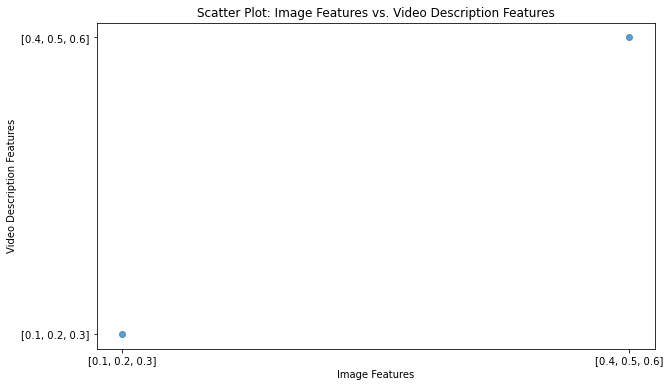

In [9]:
import pandas as pd
import matplotlib.pyplot as plt  # Add this import statement
import numpy as np

def visualize_data(integrated_data):
    # Assuming you saved the integrated data to a CSV file
    df = pd.read_csv('integrated_data.csv')  # Change the filename if you used a different format

    # Example: Scatter plot for visualizing the relationship between image features and video description features
    plt.figure(figsize=(10, 6))
    plt.scatter(df['image_feature'], df['video_description_feature'], alpha=0.7)
    plt.title('Scatter Plot: Image Features vs. Video Description Features')
    plt.xlabel('Image Features')
    plt.ylabel('Video Description Features')
    plt.show()
    # You can create more visualizations based on your specific analysis goals

# Example usage:
visualize_data(integrated_data)

In [10]:
# Step 8: Reporting
# Generate a report summarizing the findings
def generate_report(analysis_results):
    if analysis_results:
        # Extract relevant information from the analysis results
        summary_statistics = analysis_results['summary_statistics']
        correlation_matrix = analysis_results['correlation_matrix']

        # Create a simple text-based report
        report = f"Data Analysis Report\n\n"
        report += "Summary Statistics:\n"
        report += str(summary_statistics) + "\n\n"
    
        report += "Correlation Matrix:\n"
        report += str(correlation_matrix) + "\n"

        # Save the report to a text file
        with open('data_analysis_report.txt', 'w') as file:
            file.write(report)

        print("Data analysis report generated and saved.")
    else:
        print("Analysis results are None. Cannot generate the report.")

# Example usage:
generate_report(analysis_results)

Data analysis report generated and saved.
